# SNP overlap analysis for j5-7 and j5-6 eQTLs

In [1]:
library(tidyverse)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

## Load eQTLs

In [3]:
cname = c("gene_id", "variant_id", "tss_distance", "ma_samples", "ma_count",
          "maf", "pval_nominal", "slope", "slope_se")
## Junction 5-7
cmd = paste0('zcat /ceph/projects/v4_phase3_paper/analysis/eqtl_analysis/all/junctions/',
             'expression_gct/prepare_expression/fastqtl_nominal/_m/Brainseq_LIBD.allpairs.txt.gz',
             '| grep "chr11:113412884-113415420(-)"')
j57 = data.table::fread(cmd=cmd, header=FALSE, col.names=cname)
dim(j57)
## Junction 5-6
cmd = paste0('zcat /ceph/projects/v4_phase3_paper/analysis/eqtl_analysis/all/junctions/',
             'expression_gct/prepare_expression/fastqtl_nominal/_m/Brainseq_LIBD.allpairs.txt.gz',
             '| grep "chr11:113414462-113415420(-)"')
j56 = data.table::fread(cmd=cmd, header=FALSE, col.names=cname)
dim(j56)

[1] 3531    9

[1] 3530    9

In [4]:
df = j57 %>% inner_join(j56, by=c('variant_id'), suffix=c("_j57", "_j56"))
#df.to_csv('j57_and_j56_eqtls.tsv', sep='\t')
df %>% head(2)

gene_id_j57,variant_id,tss_distance_j57,ma_samples_j57,ma_count_j57,maf_j57,pval_nominal_j57,slope_j57,slope_se_j57,gene_id_j56,tss_distance_j56,ma_samples_j56,ma_count_j56,maf_j56,pval_nominal_j56,slope_j56,slope_se_j56
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:113412884-113415420(-),chr11:112915023:C:T,-497862,17,17,0.0191874,0.957382,0.00991622,0.185448,chr11:113414462-113415420(-),-499440,17,17,0.0191874,0.471292,0.0857822,0.1189670
chr11:113412884-113415420(-),chr11:112915565:C:G,-497320,257,314,0.3544020,0.860280,-0.00903263,0.051284,chr11:113414462-113415420(-),-498898,257,314,0.3544020,0.375226,-0.0291964,0.0328897


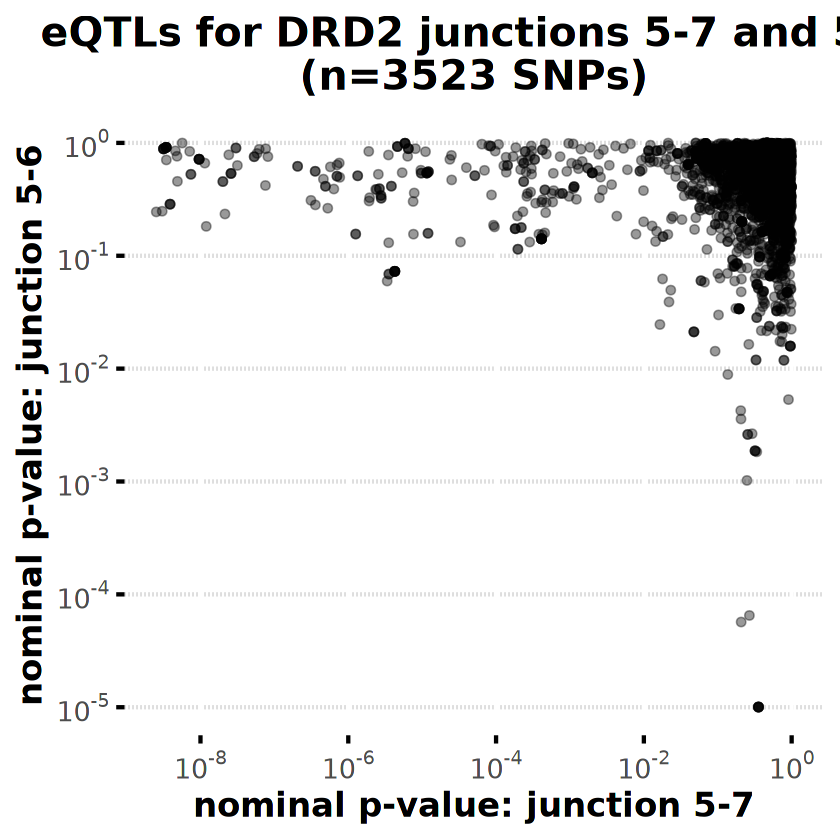

In [5]:
title = paste0("eQTLs for DRD2 junctions 5-7 and 5-6\n(n=",dim(df)[1]," SNPs)")

sca = df %>% ggscatter(x="pval_nominal_j57", y="pval_nominal_j56", alpha=0.4, 
                 ggtheme=theme_pubclean(base_size=20), 
                 xlab="nominal p-value: junction 5-7",
                 ylab="nominal p-value: junction 5-6") +
    yscale("log10", .format=TRUE) + xscale("log10", .format=TRUE) +
    font("xy.title", face="bold") +
    ggtitle(title) + theme(plot.title = element_text(hjust = 0.5, face="bold"))
print(sca)
save_ggplots("eQTL_scatterplot_j57_j57_LIBD_caudate", sca, 9, 9)

## Session Info

In [6]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-09-06 18:04:12 EDT"

   user  system elapsed 
961.798  85.252 933.998 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-09-06                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 abind         1.4-5    2016-07-21 [1] CRAN (R 4.0.2)
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.9    2021-07-27 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 